In [1]:
#import Library
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
#read CSV File
wine = pd.read_csv("~/Downloads/Data Science/data set/wine.csv")
wine


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Normalizing the numerical data 
wine_norm = scale(wine)
wine_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [4]:
#implement PCA And Then Fit
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_norm)

In [5]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

In [6]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42])

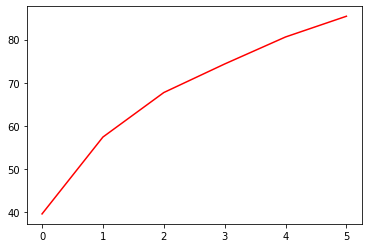

In [7]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [ ]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:2:3]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D.scatter(np.array(x),np.array(y),np.array(z),c=["green","blue","red"])

In [8]:
#import KMeans
from sklearn.cluster import KMeans

#Give 4 cluster And then fit
kmeans = KMeans(n_clusters = 4)
kmeans.fit(wine)
kmeans.labels_

array([1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 1, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0], dtype=int32)

In [ ]:
#plot KMeans cluster
plt.scatter(np.array(x),np.array(y),c=kmeans,color=["red","blue"])